## Original

In [28]:
import os
import pydicom
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_float

# Define paths
original_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (28 feb)/Data10/Original/CATHLAB"
noisy_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (28 feb)/Data10/Original/CATHLAB"
denoised_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (28 feb)/Results 10/RED-CNN/Poisson/Original"

# List of files to process
files_to_process = [
    "FCAVDP00", "FCAVDP0A", "FCAVDP0C", "FCAVDP0E", "FCAVDP0G",
    "FCAVDP0H", "FCAVDP0K", "FCAVDP0M", "FCAVDP0O", "FCAVDP0Q"
]

# Store results
ssim_results = []
ssim_noisy_list = []
ssim_denoised_list = []

# Iterate through each file and compute SSIM
for filename in files_to_process:
    normal_path = os.path.join(original_dir, filename + ".dcm")
    noisy_path = os.path.join(noisy_dir, filename + ".dcm")
    denoised_path = os.path.join(denoised_dir, filename + ".dcm")

    # Ensure all files exist
    if not (os.path.exists(normal_path) and os.path.exists(noisy_path) and os.path.exists(denoised_path)):
        print(f"Skipping {filename}: Missing file(s).")
        continue

    # Load DICOM images
    normal_dcm = pydicom.dcmread(normal_path)
    noisy_dcm = pydicom.dcmread(noisy_path)
    denoised_dcm = pydicom.dcmread(denoised_path)

    # Convert pixel data to float format
    normal_img = img_as_float(np.squeeze(normal_dcm.pixel_array))
    noisy_img = img_as_float(np.squeeze(noisy_dcm.pixel_array))
    denoised_img = img_as_float(np.squeeze(denoised_dcm.pixel_array))

    # Compute SSIM
    ssim_noisy = ssim(normal_img, noisy_img, data_range=noisy_img.max() - noisy_img.min())
    ssim_denoised = ssim(normal_img, denoised_img, data_range=denoised_img.max() - denoised_img.min())

    # Store the result
    ssim_results.append((filename, ssim_noisy, ssim_denoised))
    ssim_noisy_list.append(ssim_noisy)
    ssim_denoised_list.append(ssim_denoised)

# Compute mean and standard deviation
mean_ssim_noisy = np.mean(ssim_noisy_list)
std_ssim_noisy = np.std(ssim_noisy_list)
mean_ssim_denoised = np.mean(ssim_denoised_list)
std_ssim_denoised = np.std(ssim_denoised_list)

# Print the final summary
print("\nFinal SSIM Results:")
print(f"{'Filename':<10} {'SSIM (Noisy)':<15} {'SSIM (Denoised)':<15}")
print("=" * 40)
for filename, ssim_noisy, ssim_denoised in ssim_results:
    print(f"{filename:<10} {ssim_noisy:<15.4f} {ssim_denoised:<15.4f}")

# Print mean and standard deviation
print("=" * 40)
print(f"{'Mean':<10} {mean_ssim_noisy:<15.4f} {mean_ssim_denoised:<15.4f}")
print(f"{'Std Dev':<10} {std_ssim_noisy:<15.4f} {std_ssim_denoised:<15.4f}")
print("\nProcessing complete.")


Final SSIM Results:
Filename   SSIM (Noisy)    SSIM (Denoised)
FCAVDP00   1.0000          0.8812         
FCAVDP0A   1.0000          0.8790         
FCAVDP0C   1.0000          0.8805         
FCAVDP0E   1.0000          0.8778         
FCAVDP0G   1.0000          0.8794         
FCAVDP0H   1.0000          0.8746         
FCAVDP0K   1.0000          0.8742         
FCAVDP0M   1.0000          0.8780         
FCAVDP0O   1.0000          0.8831         
FCAVDP0Q   1.0000          0.8797         
Mean       1.0000          0.8788         
Std Dev    0.0000          0.0026         

Processing complete.


## Noisy

### RED-CNN

#### Gaussian

In [2]:
import os
import pydicom
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_float

# Define base paths
base_original_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (28 feb)/Data10/Original/CATHLAB"
base_noisy_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (28 feb)/Data10/Added Noise/CATHLAB/Gaussian"
base_denoised_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (28 feb)/Results 10/RED-CNN/Gaussian"

# Noise levels to process (0.10 to 0.30 in increments of 0.01)
noise_levels = [f"{x:.2f}" for x in np.arange(0.10, 0.31, 0.01)]

# List of filenames to process
files_to_process = [
    "FCAVDP00", "FCAVDP0A", "FCAVDP0C", "FCAVDP0E", "FCAVDP0G",
    "FCAVDP0H", "FCAVDP0K", "FCAVDP0M", "FCAVDP0O", "FCAVDP0Q"
]

# Dictionary to store SSIM results per noise level
ssim_summary = {}

# Process each noise level
for noise_level in noise_levels:
    print(f"\nProcessing noise level: {noise_level}...")

    noisy_folder = os.path.join(base_noisy_dir, f"CATHLAB Noisy ({noise_level})")
    denoised_folder = os.path.join(base_denoised_dir, f"CATHLAB Noisy ({noise_level})")

    ssim_results = []
    ssim_noisy_list = []
    ssim_denoised_list = []

    for filename in files_to_process:
        normal_path = os.path.join(base_original_dir, filename + ".dcm")
        noisy_path = os.path.join(noisy_folder, filename + ".dcm")
        denoised_path = os.path.join(denoised_folder, filename + ".dcm")

        # Ensure all files exist
        if not (os.path.exists(normal_path) and os.path.exists(noisy_path) and os.path.exists(denoised_path)):
            print(f"Skipping {filename} for noise level {noise_level}: Missing file(s).")
            continue

        # Load DICOM images
        normal_dcm = pydicom.dcmread(normal_path)
        noisy_dcm = pydicom.dcmread(noisy_path)
        denoised_dcm = pydicom.dcmread(denoised_path)

        # Convert pixel data to float format
        normal_img = img_as_float(np.squeeze(normal_dcm.pixel_array))
        noisy_img = img_as_float(np.squeeze(noisy_dcm.pixel_array))
        denoised_img = img_as_float(np.squeeze(denoised_dcm.pixel_array))

        # Compute SSIM
        ssim_noisy = ssim(normal_img, noisy_img, data_range=noisy_img.max() - noisy_img.min())
        ssim_denoised = ssim(normal_img, denoised_img, data_range=denoised_img.max() - denoised_img.min())

        # Store the results
        ssim_results.append((filename, ssim_noisy, ssim_denoised))
        ssim_noisy_list.append(ssim_noisy)
        ssim_denoised_list.append(ssim_denoised)

    # Compute mean and standard deviation
    if ssim_noisy_list and ssim_denoised_list:
        mean_ssim_noisy = np.mean(ssim_noisy_list)
        std_ssim_noisy = np.std(ssim_noisy_list)
        mean_ssim_denoised = np.mean(ssim_denoised_list)
        std_ssim_denoised = np.std(ssim_denoised_list)

        # Store results in dictionary
        ssim_summary[noise_level] = {
            "mean_noisy": mean_ssim_noisy,
            "std_noisy": std_ssim_noisy,
            "mean_denoised": mean_ssim_denoised,
            "std_denoised": std_ssim_denoised,
            "results": ssim_results
        }

    # Print results for the current noise level
    print("\nSSIM Results:")
    print(f"{'Filename':<10} {'SSIM (Noisy)':<15} {'SSIM (Denoised)':<15}")
    print("=" * 40)
    for filename, ssim_noisy, ssim_denoised in ssim_results:
        print(f"{filename:<10} {ssim_noisy:<15.4f} {ssim_denoised:<15.4f}")

    # Print mean and standard deviation
    print("=" * 40)
    print(f"{'Mean':<10} {mean_ssim_noisy:<15.4f} {mean_ssim_denoised:<15.4f}")
    print(f"{'Std Dev':<10} {std_ssim_noisy:<15.4f} {std_ssim_denoised:<15.4f}")

# Final summary across all noise levels
print("\nFinal Summary of All Noise Levels:")
print(f"{'Noise Level':<10} {'Mean SSIM (Noisy)':<20} {'Mean SSIM (Denoised)':<20}")
print("=" * 60)
for noise_level, values in ssim_summary.items():
    print(f"{noise_level:<10} {values['mean_noisy']:<20.4f} {values['mean_denoised']:<20.4f}")

print("\nProcessing complete.")



Processing noise level: 0.10...

SSIM Results:
Filename   SSIM (Noisy)    SSIM (Denoised)
FCAVDP00   0.2276          0.4443         
FCAVDP0A   0.2343          0.4354         
FCAVDP0C   0.2379          0.4378         
FCAVDP0E   0.2442          0.4458         
FCAVDP0G   0.2466          0.4506         
FCAVDP0H   0.2455          0.4438         
FCAVDP0K   0.2389          0.4402         
FCAVDP0M   0.2392          0.4421         
FCAVDP0O   0.2406          0.4455         
FCAVDP0Q   0.2482          0.4518         
Mean       0.2403          0.4437         
Std Dev    0.0059          0.0049         

Processing noise level: 0.11...

SSIM Results:
Filename   SSIM (Noisy)    SSIM (Denoised)
FCAVDP00   0.2065          0.4098         
FCAVDP0A   0.2134          0.4126         
FCAVDP0C   0.2160          0.4123         
FCAVDP0E   0.2234          0.4226         
FCAVDP0G   0.2259          0.4263         
FCAVDP0H   0.2230          0.4205         
FCAVDP0K   0.2149          0.4107         
F

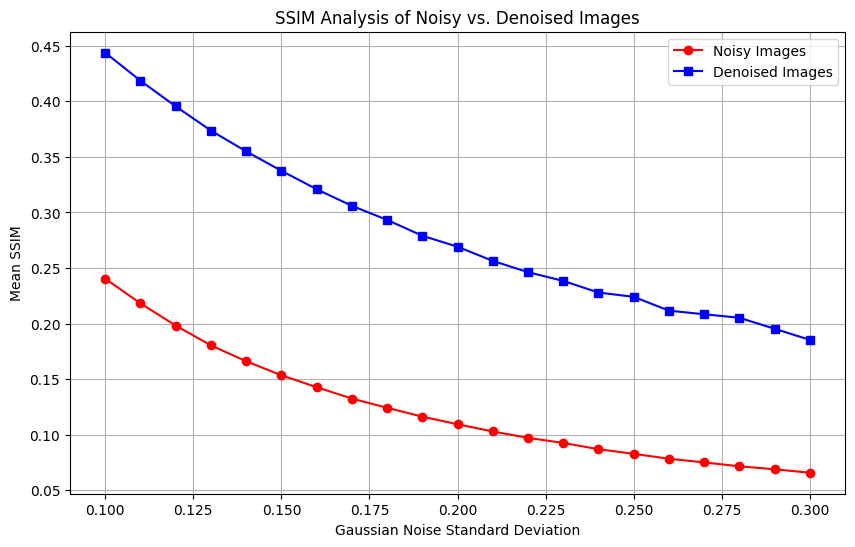

In [4]:
import matplotlib.pyplot as plt

# Ensure noise levels are sorted numerically
noise_levels = sorted(ssim_summary.keys(), key=float)  

# Extract SSIM values for plotting
mean_ssim_noisy = [ssim_summary[nl]["mean_noisy"] for nl in noise_levels]
mean_ssim_denoised = [ssim_summary[nl]["mean_denoised"] for nl in noise_levels]

# Convert noise levels to float for correct plotting
noise_levels = [float(nl) for nl in noise_levels]

# Plot SSIM values
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, mean_ssim_noisy, marker='o', linestyle='-', color='r', label='Noisy Images')
plt.plot(noise_levels, mean_ssim_denoised, marker='s', linestyle='-', color='b', label='Denoised Images')

# Labels and title
plt.xlabel("Gaussian Noise Standard Deviation")
plt.ylabel("Mean SSIM")
plt.title("SSIM Analysis of Noisy vs. Denoised Images")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


#### Poisson

In [6]:
import os
import pydicom
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_float

# Define paths
base_original_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (28 feb)/Data10/Original/CATHLAB"
base_noisy_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (28 feb)/Data10/Added Noise/CATHLAB/Poisson"
base_denoised_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (28 feb)/Results 10/RED-CNN/Poisson"

# Noise levels to process (0.10 to 0.30 in increments of 0.01)
noise_levels = [f"{x:.2f}" for x in np.arange(0.70, 0.91, 0.01)]

# List of filenames to process
files_to_process = [
    "FCAVDP00", "FCAVDP0A", "FCAVDP0C", "FCAVDP0E", "FCAVDP0G",
    "FCAVDP0H", "FCAVDP0K", "FCAVDP0M", "FCAVDP0O", "FCAVDP0Q"
]

# Dictionary to store SSIM results per noise level
ssim_summary = {}

# Process each noise level
for noise_level in noise_levels:
    print(f"\nProcessing noise level: {noise_level}...")

    noisy_folder = os.path.join(base_noisy_dir, f"CATHLAB Noisy ({noise_level})")
    denoised_folder = os.path.join(base_denoised_dir, f"CATHLAB Noisy ({noise_level})")

    ssim_results = []
    ssim_noisy_list = []
    ssim_denoised_list = []

    for filename in files_to_process:
        normal_path = os.path.join(base_original_dir, filename + ".dcm")
        noisy_path = os.path.join(noisy_folder, filename + ".dcm")
        denoised_path = os.path.join(denoised_folder, filename + ".dcm")

        # Ensure all files exist
        if not (os.path.exists(normal_path) and os.path.exists(noisy_path) and os.path.exists(denoised_path)):
            print(f"Skipping {filename} for noise level {noise_level}: Missing file(s).")
            continue

        # Load DICOM images
        normal_dcm = pydicom.dcmread(normal_path)
        noisy_dcm = pydicom.dcmread(noisy_path)
        denoised_dcm = pydicom.dcmread(denoised_path)

        # Convert pixel data to float format
        normal_img = img_as_float(np.squeeze(normal_dcm.pixel_array))
        noisy_img = img_as_float(np.squeeze(noisy_dcm.pixel_array))
        denoised_img = img_as_float(np.squeeze(denoised_dcm.pixel_array))

        # Compute SSIM
        ssim_noisy = ssim(normal_img, noisy_img, data_range=noisy_img.max() - noisy_img.min())
        ssim_denoised = ssim(normal_img, denoised_img, data_range=denoised_img.max() - denoised_img.min())

        # Store the results
        ssim_results.append((filename, ssim_noisy, ssim_denoised))
        ssim_noisy_list.append(ssim_noisy)
        ssim_denoised_list.append(ssim_denoised)

    # Compute mean and standard deviation
    if ssim_noisy_list and ssim_denoised_list:
        mean_ssim_noisy = np.mean(ssim_noisy_list)
        std_ssim_noisy = np.std(ssim_noisy_list)
        mean_ssim_denoised = np.mean(ssim_denoised_list)
        std_ssim_denoised = np.std(ssim_denoised_list)

        # Store results in dictionary
        ssim_summary[noise_level] = {
            "mean_noisy": mean_ssim_noisy,
            "std_noisy": std_ssim_noisy,
            "mean_denoised": mean_ssim_denoised,
            "std_denoised": std_ssim_denoised,
            "results": ssim_results
        }

    # Print results for the current noise level
    print("\nSSIM Results:")
    print(f"{'Filename':<10} {'SSIM (Noisy)':<15} {'SSIM (Denoised)':<15}")
    print("=" * 40)
    for filename, ssim_noisy, ssim_denoised in ssim_results:
        print(f"{filename:<10} {ssim_noisy:<15.4f} {ssim_denoised:<15.4f}")

    # Print mean and standard deviation
    print("=" * 40)
    print(f"{'Mean':<10} {mean_ssim_noisy:<15.4f} {mean_ssim_denoised:<15.4f}")
    print(f"{'Std Dev':<10} {std_ssim_noisy:<15.4f} {std_ssim_denoised:<15.4f}")

# Final summary across all noise levels
print("\nFinal Summary of All Noise Levels:")
print(f"{'Noise Level':<10} {'Mean SSIM (Noisy)':<20} {'Mean SSIM (Denoised)':<20}")
print("=" * 60)
for noise_level, values in ssim_summary.items():
    print(f"{noise_level:<10} {values['mean_noisy']:<20.4f} {values['mean_denoised']:<20.4f}")

print("\nProcessing complete.")



Processing noise level: 0.70...

SSIM Results:
Filename   SSIM (Noisy)    SSIM (Denoised)
FCAVDP00   0.7562          0.7590         
FCAVDP0A   0.7612          0.7607         
FCAVDP0C   0.7595          0.7619         
FCAVDP0E   0.7662          0.7585         
FCAVDP0G   0.7673          0.7586         
FCAVDP0H   0.7650          0.7549         
FCAVDP0K   0.7650          0.7536         
FCAVDP0M   0.7646          0.7602         
FCAVDP0O   0.7664          0.7656         
FCAVDP0Q   0.7702          0.7615         
Mean       0.7641          0.7595         
Std Dev    0.0039          0.0033         

Processing noise level: 0.71...

SSIM Results:
Filename   SSIM (Noisy)    SSIM (Denoised)
FCAVDP00   0.7611          0.7668         
FCAVDP0A   0.7753          0.7665         
FCAVDP0C   0.7704          0.7672         
FCAVDP0E   0.7743          0.7685         
FCAVDP0G   0.7722          0.7657         
FCAVDP0H   0.7745          0.7604         
FCAVDP0K   0.7662          0.7578         
F

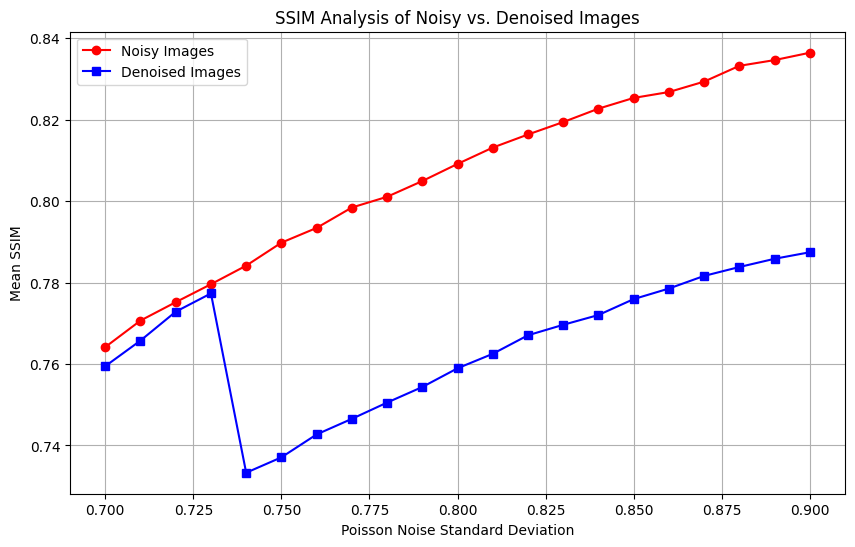

In [7]:
import matplotlib.pyplot as plt

# Ensure noise levels are sorted numerically
noise_levels = sorted(ssim_summary.keys(), key=float)  

# Extract SSIM values for plotting
mean_ssim_noisy = [ssim_summary[nl]["mean_noisy"] for nl in noise_levels]
mean_ssim_denoised = [ssim_summary[nl]["mean_denoised"] for nl in noise_levels]

# Convert noise levels to float for correct plotting
noise_levels = [float(nl) for nl in noise_levels]

# Plot SSIM values
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, mean_ssim_noisy, marker='o', linestyle='-', color='r', label='Noisy Images')
plt.plot(noise_levels, mean_ssim_denoised, marker='s', linestyle='-', color='b', label='Denoised Images')

# Labels and title
plt.xlabel("Poisson Noise Standard Deviation")
plt.ylabel("Mean SSIM")
plt.title("SSIM Analysis of Noisy vs. Denoised Images")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### NLMD

#### Gaussian

In [8]:
import os
import pydicom
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_float

# Define base paths
base_original_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (12 mar)/Data 10/Original/CATHLAB"
base_noisy_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (12 mar)/Data 10/Added Noise/CATHLAB/Gaussian"
base_denoised_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (12 mar)/Results 10/NLMD57/Gaussian"

# Noise levels to process (0.10 to 0.30 in increments of 0.01)
noise_levels = [f"{x:.2f}" for x in np.arange(0.10, 0.31, 0.01)]

# List of filenames to process
files_to_process = [
    "FCAVDP00", "FCAVDP0A", "FCAVDP0C", "FCAVDP0E", "FCAVDP0G",
    "FCAVDP0H", "FCAVDP0K", "FCAVDP0M", "FCAVDP0O", "FCAVDP0Q"
]

# Dictionary to store SSIM results per noise level
ssim_summary = {}

# Process each noise level
for noise_level in noise_levels:
    print(f"\nProcessing noise level: {noise_level}...")

    noisy_folder = os.path.join(base_noisy_dir, f"CATHLAB Noisy ({noise_level})")
    denoised_folder = os.path.join(base_denoised_dir, f"CATHLAB Noisy ({noise_level})")

    ssim_results = []
    ssim_noisy_list = []
    ssim_denoised_list = []

    for filename in files_to_process:
        normal_path = os.path.join(base_original_dir, filename + ".dcm")
        noisy_path = os.path.join(noisy_folder, filename + ".dcm")
        denoised_path = os.path.join(denoised_folder, filename + ".dcm")

        # Ensure all files exist
        if not (os.path.exists(normal_path) and os.path.exists(noisy_path) and os.path.exists(denoised_path)):
            print(f"Skipping {filename} for noise level {noise_level}: Missing file(s).")
            continue

        # Load DICOM images
        normal_dcm = pydicom.dcmread(normal_path)
        noisy_dcm = pydicom.dcmread(noisy_path)
        denoised_dcm = pydicom.dcmread(denoised_path)

        # Convert pixel data to float format
        normal_img = img_as_float(np.squeeze(normal_dcm.pixel_array))
        noisy_img = img_as_float(np.squeeze(noisy_dcm.pixel_array))
        denoised_img = img_as_float(np.squeeze(denoised_dcm.pixel_array))

        # Compute SSIM
        ssim_noisy = ssim(normal_img, noisy_img, data_range=noisy_img.max() - noisy_img.min())
        ssim_denoised = ssim(normal_img, denoised_img, data_range=denoised_img.max() - denoised_img.min())

        # Store the results
        ssim_results.append((filename, ssim_noisy, ssim_denoised))
        ssim_noisy_list.append(ssim_noisy)
        ssim_denoised_list.append(ssim_denoised)

    # Compute mean and standard deviation
    if ssim_noisy_list and ssim_denoised_list:
        mean_ssim_noisy = np.mean(ssim_noisy_list)
        std_ssim_noisy = np.std(ssim_noisy_list)
        mean_ssim_denoised = np.mean(ssim_denoised_list)
        std_ssim_denoised = np.std(ssim_denoised_list)

        # Store results in dictionary
        ssim_summary[noise_level] = {
            "mean_noisy": mean_ssim_noisy,
            "std_noisy": std_ssim_noisy,
            "mean_denoised": mean_ssim_denoised,
            "std_denoised": std_ssim_denoised,
            "results": ssim_results
        }

    # Print results for the current noise level
    print("\nSSIM Results:")
    print(f"{'Filename':<10} {'SSIM (Noisy)':<15} {'SSIM (Denoised)':<15}")
    print("=" * 40)
    for filename, ssim_noisy, ssim_denoised in ssim_results:
        print(f"{filename:<10} {ssim_noisy:<15.4f} {ssim_denoised:<15.4f}")

    # Print mean and standard deviation
    print("=" * 40)
    print(f"{'Mean':<10} {mean_ssim_noisy:<15.4f} {mean_ssim_denoised:<15.4f}")
    print(f"{'Std Dev':<10} {std_ssim_noisy:<15.4f} {std_ssim_denoised:<15.4f}")

# Final summary across all noise levels
print("\nFinal Summary of All Noise Levels:")
print(f"{'Noise Level':<10} {'Mean SSIM (Noisy)':<20} {'Mean SSIM (Denoised)':<20}")
print("=" * 60)
for noise_level, values in ssim_summary.items():
    print(f"{noise_level:<10} {values['mean_noisy']:<20.4f} {values['mean_denoised']:<20.4f}")

print("\nProcessing complete.")



Processing noise level: 0.10...

SSIM Results:
Filename   SSIM (Noisy)    SSIM (Denoised)
FCAVDP00   0.2276          0.6134         
FCAVDP0A   0.2343          0.5947         
FCAVDP0C   0.2379          0.6094         
FCAVDP0E   0.2442          0.6196         
FCAVDP0G   0.2466          0.6319         
FCAVDP0H   0.2455          0.6283         
FCAVDP0K   0.2389          0.6076         
FCAVDP0M   0.2392          0.6061         
FCAVDP0O   0.2406          0.6206         
FCAVDP0Q   0.2482          0.6171         
Mean       0.2403          0.6149         
Std Dev    0.0059          0.0105         

Processing noise level: 0.11...

SSIM Results:
Filename   SSIM (Noisy)    SSIM (Denoised)
FCAVDP00   0.2065          0.5689         
FCAVDP0A   0.2134          0.5630         
FCAVDP0C   0.2160          0.5693         
FCAVDP0E   0.2234          0.5819         
FCAVDP0G   0.2259          0.5762         
FCAVDP0H   0.2230          0.5821         
FCAVDP0K   0.2149          0.5896         
F

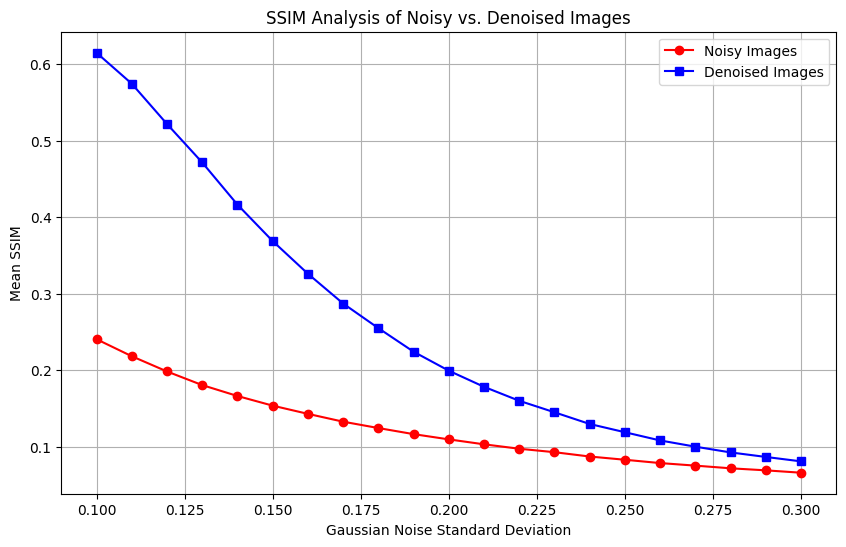

In [9]:
import matplotlib.pyplot as plt

# Ensure noise levels are sorted numerically
noise_levels = sorted(ssim_summary.keys(), key=float)  

# Extract SSIM values for plotting
mean_ssim_noisy = [ssim_summary[nl]["mean_noisy"] for nl in noise_levels]
mean_ssim_denoised = [ssim_summary[nl]["mean_denoised"] for nl in noise_levels]

# Convert noise levels to float for correct plotting
noise_levels = [float(nl) for nl in noise_levels]

# Plot SSIM values
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, mean_ssim_noisy, marker='o', linestyle='-', color='r', label='Noisy Images')
plt.plot(noise_levels, mean_ssim_denoised, marker='s', linestyle='-', color='b', label='Denoised Images')

# Labels and title
plt.xlabel("Gaussian Noise Standard Deviation")
plt.ylabel("Mean SSIM")
plt.title("SSIM Analysis of Noisy vs. Denoised Images")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


#### Poisson

In [29]:
import os
import pydicom
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_float

# Define paths
base_original_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (12 mar)/Data 10/Original/CATHLAB"
base_noisy_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (12 mar)/Data 10/Added Noise/CATHLAB/Poisson"
base_denoised_dir = "C:/Matthew/Kuliah/Semester 8/Pengolahan Data/Progress code terbaru (12 mar)/Results 10/NLMD57/Poisson"


# Noise levels to process (0.10 to 0.30 in increments of 0.01)
noise_levels = [f"{x:.2f}" for x in np.arange(0.70, 0.91, 0.01)]

# List of filenames to process
files_to_process = [
    "FCAVDP00", "FCAVDP0A", "FCAVDP0C", "FCAVDP0E", "FCAVDP0G",
    "FCAVDP0H", "FCAVDP0K", "FCAVDP0M", "FCAVDP0O", "FCAVDP0Q"
]

# Dictionary to store SSIM results per noise level
ssim_summary = {}

# Process each noise level
for noise_level in noise_levels:
    print(f"\nProcessing noise level: {noise_level}...")

    noisy_folder = os.path.join(base_noisy_dir, f"CATHLAB Noisy ({noise_level})")
    denoised_folder = os.path.join(base_denoised_dir, f"CATHLAB Noisy ({noise_level})")

    ssim_results = []
    ssim_noisy_list = []
    ssim_denoised_list = []

    for filename in files_to_process:
        normal_path = os.path.join(base_original_dir, filename + ".dcm")
        noisy_path = os.path.join(noisy_folder, filename + ".dcm")
        denoised_path = os.path.join(denoised_folder, filename + ".dcm")

        # Ensure all files exist
        if not (os.path.exists(normal_path) and os.path.exists(noisy_path) and os.path.exists(denoised_path)):
            print(f"Skipping {filename} for noise level {noise_level}: Missing file(s).")
            continue

        # Load DICOM images
        normal_dcm = pydicom.dcmread(normal_path)
        noisy_dcm = pydicom.dcmread(noisy_path)
        denoised_dcm = pydicom.dcmread(denoised_path)

        # Convert pixel data to float format
        normal_img = img_as_float(np.squeeze(normal_dcm.pixel_array))
        noisy_img = img_as_float(np.squeeze(noisy_dcm.pixel_array))
        denoised_img = img_as_float(np.squeeze(denoised_dcm.pixel_array))

        # Compute SSIM
        ssim_noisy = ssim(normal_img, noisy_img, data_range=noisy_img.max() - noisy_img.min())
        ssim_denoised = ssim(normal_img, denoised_img, data_range=denoised_img.max() - denoised_img.min())

        # Store the results
        ssim_results.append((filename, ssim_noisy, ssim_denoised))
        ssim_noisy_list.append(ssim_noisy)
        ssim_denoised_list.append(ssim_denoised)

    # Compute mean and standard deviation
    if ssim_noisy_list and ssim_denoised_list:
        mean_ssim_noisy = np.mean(ssim_noisy_list)
        std_ssim_noisy = np.std(ssim_noisy_list)
        mean_ssim_denoised = np.mean(ssim_denoised_list)
        std_ssim_denoised = np.std(ssim_denoised_list)

        # Store results in dictionary
        ssim_summary[noise_level] = {
            "mean_noisy": mean_ssim_noisy,
            "std_noisy": std_ssim_noisy,
            "mean_denoised": mean_ssim_denoised,
            "std_denoised": std_ssim_denoised,
            "results": ssim_results
        }

    # Print results for the current noise level
    print("\nSSIM Results:")
    print(f"{'Filename':<10} {'SSIM (Noisy)':<15} {'SSIM (Denoised)':<15}")
    print("=" * 40)
    for filename, ssim_noisy, ssim_denoised in ssim_results:
        print(f"{filename:<10} {ssim_noisy:<15.4f} {ssim_denoised:<15.4f}")

    # Print mean and standard deviation
    print("=" * 40)
    print(f"{'Mean':<10} {mean_ssim_noisy:<15.4f} {mean_ssim_denoised:<15.4f}")
    print(f"{'Std Dev':<10} {std_ssim_noisy:<15.4f} {std_ssim_denoised:<15.4f}")

# Final summary across all noise levels
print("\nFinal Summary of All Noise Levels:")
print(f"{'Noise Level':<10} {'Mean SSIM (Noisy)':<20} {'Mean SSIM (Denoised)':<20}")
print("=" * 60)
for noise_level, values in ssim_summary.items():
    print(f"{noise_level:<10} {values['mean_noisy']:<20.4f} {values['mean_denoised']:<20.4f}")

print("\nProcessing complete.")



Processing noise level: 0.70...

SSIM Results:
Filename   SSIM (Noisy)    SSIM (Denoised)
FCAVDP00   0.7562          0.6850         
FCAVDP0A   0.7612          0.6575         
FCAVDP0C   0.7595          0.6606         
FCAVDP0E   0.7662          0.6673         
FCAVDP0G   0.7673          0.6637         
FCAVDP0H   0.7650          0.6514         
FCAVDP0K   0.7650          0.6520         
FCAVDP0M   0.7646          0.6586         
FCAVDP0O   0.7664          0.6775         
FCAVDP0Q   0.7702          0.6714         
Mean       0.7641          0.6645         
Std Dev    0.0039          0.0104         

Processing noise level: 0.71...

SSIM Results:
Filename   SSIM (Noisy)    SSIM (Denoised)
FCAVDP00   0.7611          0.6881         
FCAVDP0A   0.7753          0.6919         
FCAVDP0C   0.7704          0.6890         
FCAVDP0E   0.7743          0.6871         
FCAVDP0G   0.7722          0.6669         
FCAVDP0H   0.7745          0.6612         
FCAVDP0K   0.7662          0.6531         
F

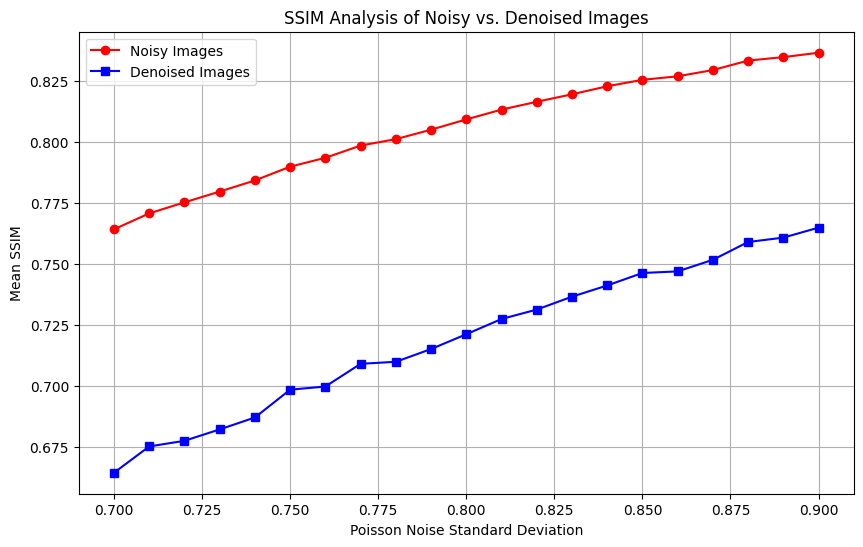

In [30]:
import matplotlib.pyplot as plt

# Ensure noise levels are sorted numerically
noise_levels = sorted(ssim_summary.keys(), key=float)  

# Extract SSIM values for plotting
mean_ssim_noisy = [ssim_summary[nl]["mean_noisy"] for nl in noise_levels]
mean_ssim_denoised = [ssim_summary[nl]["mean_denoised"] for nl in noise_levels]

# Convert noise levels to float for correct plotting
noise_levels = [float(nl) for nl in noise_levels]

# Plot SSIM values
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, mean_ssim_noisy, marker='o', linestyle='-', color='r', label='Noisy Images')
plt.plot(noise_levels, mean_ssim_denoised, marker='s', linestyle='-', color='b', label='Denoised Images')

# Labels and title
plt.xlabel("Poisson Noise Standard Deviation")
plt.ylabel("Mean SSIM")
plt.title("SSIM Analysis of Noisy vs. Denoised Images")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()